In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression



In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('../../Dataset/BID-Historical-Data_Group-9.csv', index_col='Date', parse_dates=True)

# Tiền xử lí dữ liệu


In [3]:
# 3. Chuyển các giá trị trong cột về number
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,25141.5,24950.2,25332.9,24950.2,1450000,0.0108
2019-03-04,25715.5,25332.9,25830.3,25256.3,1150000,0.0228
2019-03-05,26480.9,25409.4,27016.6,25409.4,5300000,0.0298
2019-03-06,26595.7,26480.9,26710.5,26327.8,2009999,0.0043
2019-03-07,26710.5,26787.0,26978.3,26557.4,2140000,0.0043
...,...,...,...,...,...,...
2024-05-27,48900.0,49400.0,49400.0,48550.0,763200,-0.0061
2024-05-28,49100.0,49000.0,49200.0,48600.0,1230000,0.0041
2024-05-29,48600.0,49450.0,49450.0,48600.0,1390000,-0.0102


In [4]:
# 4. Loại các giá trị null
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

In [5]:
# 5. Chia train test
df = data
df = df[['Price']]
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size 

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
# 6. Chạy auto Arima
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=19616.395, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=19297.700, Time=1.69 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=19616.786, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=19163.456, Time=4.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=10.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.08 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=19161.702, Time=4.99 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=19296.237, Time=1.80 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.69 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.11 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=19163.457, Time=25.80 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=7.44 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=19

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1181
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -9577.851
Date:                            Thu, 20 Jun 2024   AIC                          19161.702
Time:                                    12:31:54   BIC                          19176.892
Sample:                                         0   HQIC                         19167.432
                                           - 1181                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6342      0.014    -45.089      0.000      -0.662      -0.607
ar.S.L24      -0.3128      0.015    -20.239      0.000      -0.343      -0.282
sigma2      7.549e+05   2.27e+04     33.184      0.000     7.1e+05       8e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):               306.76
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.48
Prob(H) (two-sided):                  0.18   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# 7. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [9]:
# 8. Dự đoán 30 ngày tiếp theo
last_index_30 =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index_30, stop=last_index_30+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index_30+1, last_index_30+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
# print('Predicted closing prices for the next 30 days:')
# print(y_next_30_days)

In [10]:
# 9. Dự đoán 60 ngày tiếp theo
last_index_60 =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index_60, stop=last_index_60+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index_60+1, last_index_60+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
# print('Predicted closing prices for the next 60 days:')
# print(y_next_60_days)

In [11]:
# 10. Dự đoán 90 ngày tiếp theo
last_index_90 =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index_90, stop=last_index_90+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index_90+1, last_index_90+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
# print('Predicted closing prices for the next 90 days:')
# print(y_next_90_days)

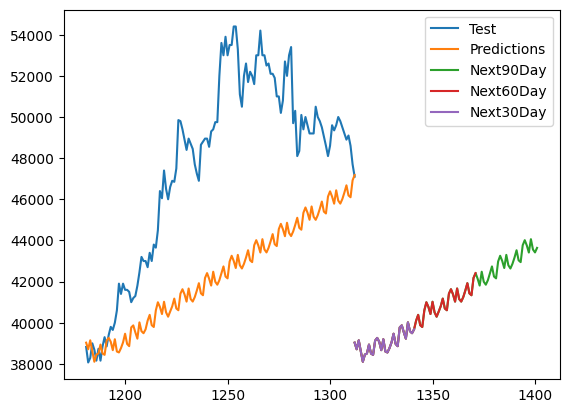

In [12]:
#11. Vẽ đồ thị các giá trị từ train tới test và dự đoán 90 ngày sau
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_30,y_next_30_days)
plt.legend([ 'Test', 'Predictions','Next90Day','Next60Day','Next30Day'])
plt.show()

In [13]:
#12. Đánh giá mô hình

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Tính toán RMSE, MAPE và MAE cho tập test
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 6158.299177101673
Testing MAPE: 10.652054093825537
Testing MAE: 5292.188824964198
